# Learning From Data HW7

In [1]:
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

## 1 Validation

In [2]:
data = np.loadtxt('../HW6/in.dta')
X, y = data[:,:2], data[:,2]

data_test = np.loadtxt('../HW6/out.dta')
X_test, y_test = data_test[:,:2], data_test[:,2]

In [3]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=25, shuffle=False)

In [11]:
phis = [
    lambda X: np.ones((X.shape[0],1)),
    lambda X: X[:,0],
    lambda X: X[:,1],
    lambda X: X[:,0]**2,
    lambda X: X[:,1]**2,
    lambda X: X[:,0]*X[:,1],
    lambda X: np.abs(X[:,0] - X[:,1]),
    lambda X: np.abs(X[:,0] + X[:,1]),
]

Zs = lambda k: lambda X: np.column_stack([phi(X) for phi in phis[:k+1]])

In [12]:
for k in range(8):
    reg = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_val_pred = np.sign(reg.predict(Zs(k)(X_val)))
    print("k=", k, "validation classification error:", np.mean(y_val_pred != y_val))

k= 0 validation classification error: 0.4
k= 1 validation classification error: 0.5
k= 2 validation classification error: 0.7
k= 3 validation classification error: 0.3
k= 4 validation classification error: 0.5
k= 5 validation classification error: 0.2
k= 6 validation classification error: 0.0
k= 7 validation classification error: 0.1


When k = 6, the error is smallest, d

In [13]:
for k in range(8):
    reg2 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_test_pred = np.sign(reg2.predict(Zs(k)(X_test)))
    print("k=", k, "test classification error:", np.mean(y_test_pred != y_test))

k= 0 test classification error: 0.472
k= 1 test classification error: 0.488
k= 2 test classification error: 0.648
k= 3 test classification error: 0.42
k= 4 test classification error: 0.416
k= 5 test classification error: 0.188
k= 6 test classification error: 0.084
k= 7 test classification error: 0.072


When k = 7, the out-of-sample error is the smallest, e.

In [14]:
X_train, X_val, y_train, y_val = X_val, X_train, y_val, y_train

for k in range(8):
    reg3 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_val_pred = np.sign(reg3.predict(Zs(k)(X_val)))
    print("k=", k, "validation classification error:", np.mean(y_val_pred != y_val))

# Swap validation and training data back again
X_val, X_train, y_val, y_train = X_train, X_val, y_train, y_val

k= 0 validation classification error: 0.44
k= 1 validation classification error: 0.44
k= 2 validation classification error: 0.44
k= 3 validation classification error: 0.28
k= 4 validation classification error: 0.36
k= 5 validation classification error: 0.2
k= 6 validation classification error: 0.08
k= 7 validation classification error: 0.12


Also when k = 6, the classification error on the validation set is smallest.

In [15]:
X_train, X_val, y_train, y_val = X_val, X_train, y_val, y_train

for k in range(8):
    reg4 = LinearRegression(fit_intercept=False).fit(Zs(k)(X_train), y_train)
    y_test_pred = np.sign(reg4.predict(Zs(k)(X_test)))
    print("k=", k, "test classification error:", np.mean(y_test_pred != y_test))

# Swap validation and training data back again
X_val, X_train, y_val, y_train = X_train, X_val, y_train, y_val

k= 0 test classification error: 0.472
k= 1 test classification error: 0.472
k= 2 test classification error: 0.5
k= 3 test classification error: 0.396
k= 4 test classification error: 0.388
k= 5 test classification error: 0.284
k= 6 test classification error: 0.192
k= 7 test classification error: 0.196


So when k = 6, the out of sample is the smallest. 

When k = 6, two models have a error near 0.1 and 0.2.

## 6 Validation Bias

In [17]:
es = np.random.rand(100000, 2)
e = np.min(es, axis=1)
np.mean(e)

0.33191148989257135

So the expected value is 0.5, 0.5, 0.33, near d.

## 7 Cross Validation

The answer isd, but I do not know clearly why.

## 8 PLA vs. SVM

## Intermission: Solving quadratic optimization problems with cvxopt

In [4]:
import cvxopt
help(cvxopt)

Help on package cvxopt:

NAME
    cvxopt - Python package for convex optimization

DESCRIPTION
    CVXOPT is a free software package for convex optimization based on the 
    Python programming language. It can be used with the interactive Python 
    interpreter, on the command line by executing Python scripts, or 
    integrated in other software via Python extension modules. Its main 
    purpose is to make the development of software for convex optimization 
    applications straightforward by building on Python's extensive standard 
    library and on the strengths of Python as a high-level programming 
    language.

PACKAGE CONTENTS
    _version
    amd
    base
    blas
    cholmod
    coneprog
    cvxprog
    dsdp
    fftw
    glpk
    gsl
    info
    lapack
    misc
    misc_solvers
    modeling
    msk
    printing
    solvers
    umfpack

CLASSES
    builtins.object
        cvxopt.base.matrix
        cvxopt.base.spmatrix
    
    class matrix(builtins.object)
     |  Metho

Here is an example

In [5]:
from cvxopt.solvers import qp

Minimize $ f(x) = 3x_1^2 + x_2^2 + 2x_1 x_2 + x_1 + 6x_2 + 2 $

subject to $2x_1 + 3x_2 \ge 4$ and $x_1\ge 0$ and $x_2 \ge 0$.

equals to 

Minimize $ f(\mathbf x) = \frac12 \mathbf x^T P \mathbf x + \mathbf q^T \mathbf x $

Minimize $ f(\mathbf x) = \frac12 \mathbf x^T
\begin{bmatrix}
6 & 2 \\ 2 & 2
\end{bmatrix}
\mathbf x +
\begin{bmatrix}
1 & 6 \\
\end{bmatrix}
\mathbf x $

In [44]:
P = np.array([[6, 2.0],
              [2.0, 2.0]])

q = np.array([[1.0], 
              [6.0]])

G = np.array([
    [-2.0, 3.0],
    [-1.0, 0.0],
    [0.0, -1.0],
])
    
h = np.array([[4.0], 
              [0.0], 
              [0.0]])

In [47]:
P_cvx = cvxopt.matrix(P)
q_cvx = cvxopt.matrix(q)
G_cvx = cvxopt.matrix(G)
h_cvx = cvxopt.matrix(h)
qp_sol = qp(P_cvx, q_cvx, G_cvx, h_cvx)
qp_sol

     pcost       dcost       gap    pres   dres
 0: -4.4395e-01  4.3326e+00  1e+01  1e+00  1e+00
 1: -5.8268e+00 -3.4321e+00  5e+00  5e-01  6e-01
 2:  4.7553e-01 -4.1590e-01  9e-01  1e-16  3e-15
 3:  8.2995e-03 -3.8000e-03  1e-02  4e-16  3e-16
 4:  8.3268e-05 -3.7789e-05  1e-04  2e-16  3e-16
 5:  8.3266e-07 -3.7786e-07  1e-06  1e-16  2e-16
 6:  8.3266e-09 -3.7786e-09  1e-08  1e-16  1e-16
Optimal solution found.


{'x': <2x1 matrix, tc='d'>,
 'y': <0x1 matrix, tc='d'>,
 's': <3x1 matrix, tc='d'>,
 'z': <3x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.2105183813131246e-08,
 'relative gap': None,
 'primal objective': 8.326574929943946e-09,
 'dual objective': -3.77860888318716e-09,
 'primal infeasibility': 1.3227889867633178e-16,
 'dual infeasibility': 1.460156327451732e-16,
 'primal slack': 4.188220861968949e-10,
 'dual slack': 9.446522138398993e-10,
 'iterations': 6}

In [51]:
np.array(qp_sol['x'])

array([[5.81364238e-09],
       [4.18822086e-10]])

First is the PLA then SVM

In [11]:
def random_target_function():
    x0, y0 = 2*np.random.rand()-1, 2*np.random.rand()-1
    x1, y1 = 2*np.random.rand()-1, 2*np.random.rand()-1
    return lambda X: np.sign(X[:,2] - (y1 - y0)/(x1 - x0)*(X[:,1] - x0) - y0)

In [25]:
f = random_target_function()
N = 30
X = 2*np.random.rand(N, 3) - 1
X[:,0] = 1
y = f(X)

In [26]:
def plot_points(X, y):
    below = np.where(y < 0)
    above = np.where(y > 0)
    plt.scatter(X[below,1], X[below,2])
    plt.scatter(X[above,1], X[above,2])
    plt.legend(["-1", "+1"])

Use sklearn to build PLA

In [27]:
from sklearn.linear_model import Perceptron

pla = Perceptron(fit_intercept=False, max_iter=99999)

pla.fit(X, y)

Perceptron(fit_intercept=False, max_iter=99999)

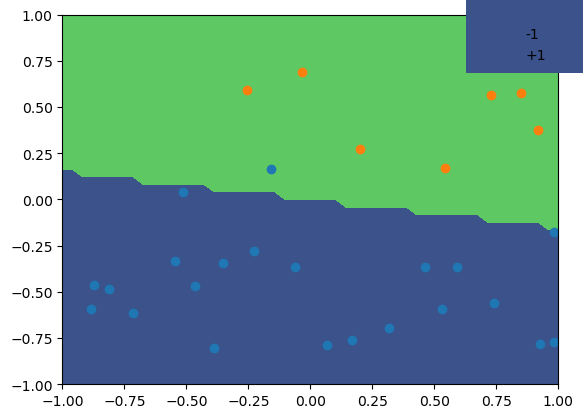

In [29]:
Nplot = 50
xx = np.linspace(-1, 1, Nplot)
yy = xx
XX, YY = np.meshgrid(xx, yy)
Xplot = np.zeros((Nplot**2, 3))
Xplot[:,0] = 1
Xplot[:,1] = XX.reshape(-1)
Xplot[:,2] = YY.reshape(-1)
yplot = pla.predict(Xplot)
ZZ = yplot.reshape(XX.shape)
plt.contourf(XX, YY, ZZ, [-1, 0, 1])
plot_points(X, y)
plt.show()

In [86]:
class SVM:
    def fit(self, X, y):
        P = np.eye(3)
        P[0,0] = 0.0
        G = -y[:, np.newaxis]*X
        h = -np.ones((N,1))
        q = np.zeros((3,1))
        
        P_cvx = cvxopt.matrix(P)
        q_cvx = cvxopt.matrix(q)
        G_cvx = cvxopt.matrix(G)
        h_cvx = cvxopt.matrix(h)
        cvxopt.solvers.options['show_progress'] = False
        qp_sol = qp(P_cvx, q_cvx, G_cvx, h_cvx)
        cvxopt.solvers.options['show_progress'] = True
        w = np.array(qp_sol["x"])
        self.w = w
        
    def predict(self, X):
        return np.sign(X @ self.w).flatten()
    

In [87]:
pla = Perceptron(fit_intercept=False, max_iter=900)
svm = SVM()

SVM percent wins:  0.0
SVM percent wins:  0.7395833333333334
SVM percent wins:  0.7230769230769231
SVM percent wins:  0.6840277777777778
SVM percent wins:  0.694300518134715
SVM percent wins:  0.6923076923076923
SVM percent wins:  0.6897746967071057
SVM percent wins:  0.68
SVM percent wins:  0.685640362225097
SVM percent wins:  0.6874279123414071


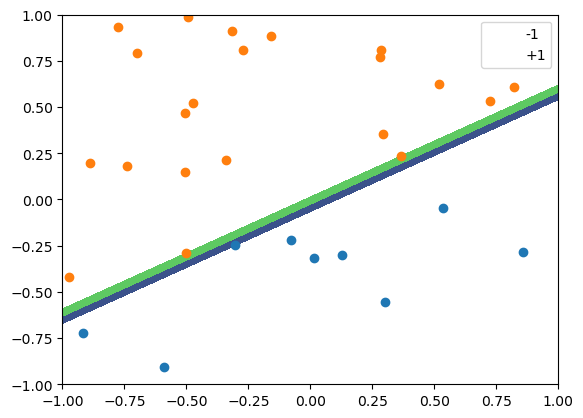

In [88]:
pla_wins = 0
svm_wins = 0
total = 0

for i in range(1000):
    # Create training dataset
    f = random_target_function()
    X = 2*np.random.rand(N, 3) - 1
    X[:,0] = 1
    y = f(X)
    if np.all(y == y[0]):
        continue
    
    # Create testing dataset
    X_test = 2*np.random.rand(1000, 3) - 1
    X_test[:,0] = 1
    y_test = f(X_test)
    
    pla.fit(X, y)
    e_pla = np.sum(pla.predict(X_test) != y_test)
    
    # Solve with SVM
    svm.fit(X, y)
    e_svm = np.sum(svm.predict(X_test) != y_test)
    
    if e_svm > e_pla:
        pla_wins += 1
        total += 1
    if e_pla > e_svm:
        svm_wins += 1
        total += 1
        
    if i % 100 == 0 and total > 0:
        print ("SVM percent wins: ", svm_wins/total)
Nplot = 50
xx = np.linspace(-1, 1, Nplot)
yy = xx
XX, YY = np.meshgrid(xx, yy)
Xplot = np.zeros((Nplot**2, 3))
Xplot[:,0] = 1
Xplot[:,1] = XX.reshape(-1)
Xplot[:,2] = YY.reshape(-1)
yplot = Xplot @ svm.w
ZZ = yplot.reshape(XX.shape)
plt.contourf(XX, YY, ZZ, [-1, 0, 1])
plot_points(X, y)
plt.show()

About 60 percentage of time SVM wins.

SVM percent wins:  1.0
mean vecs: 3.0
SVM percent wins:  0.7676767676767676
mean vecs: 3.0
SVM percent wins:  0.7783505154639175
mean vecs: 2.9950248756218905
SVM percent wins:  0.7773972602739726
mean vecs: 2.993355481727575
SVM percent wins:  0.7712082262210797
mean vecs: 2.9950124688279303
SVM percent wins:  0.7839506172839507
mean vecs: 2.9940119760479043
SVM percent wins:  0.7710843373493976
mean vecs: 2.995008319467554
SVM percent wins:  0.7764705882352941
mean vecs: 2.9957203994293864
SVM percent wins:  0.7747747747747747
mean vecs: 2.9962546816479403
SVM percent wins:  0.7860411899313501
mean vecs: 2.9966703662597114


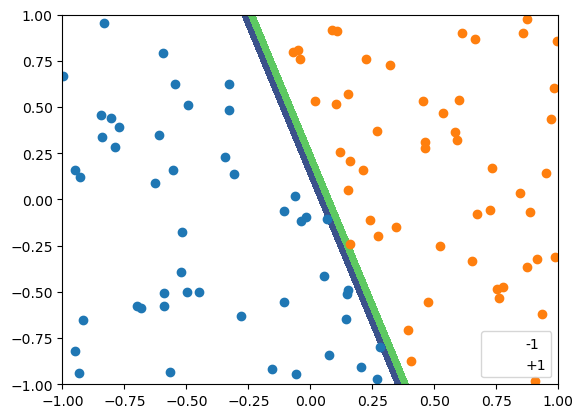

In [89]:
N = 100

pla = Perceptron(fit_intercept=False, max_iter=900)
svm = SVM()

pla_wins = 0
svm_wins = 0
total = 0

num_support_vectors = []

for i in range(1000):
    # Create training dataset
    f = random_target_function()
    X = 2*np.random.rand(N, 3) - 1
    X[:,0] = 1
    y = f(X)
    if np.all(y == y[0]):
        continue
    
    # Create testing dataset
    X_test = 2*np.random.rand(1000, 3) - 1
    X_test[:,0] = 1
    y_test = f(X_test)

    
    # Solve with PLA
    pla.fit(X, y)
    e_pla = np.sum(pla.predict(X_test) != y_test)
    
    # Solve with SVM
    svm.fit(X, y)
    nvecs = np.sum(np.abs(X @ svm.w).flatten() <= 1.001)
    num_support_vectors.append(nvecs)
    e_svm = np.sum(svm.predict(X_test) != y_test)
    
    if e_svm > e_pla:
        pla_wins += 1
        total += 1
    if e_pla > e_svm:
        svm_wins += 1
        total += 1
        
    if i % 100 == 0 and total > 0:
        print ("SVM percent wins: ", svm_wins/total)
        print("mean vecs:", np.mean(num_support_vectors))

    
Nplot = 50
xx = np.linspace(-1, 1, Nplot)
yy = xx
XX, YY = np.meshgrid(xx, yy)
Xplot = np.zeros((Nplot**2, 3))
Xplot[:,0] = 1
Xplot[:,1] = XX.reshape(-1)
Xplot[:,2] = YY.reshape(-1)
yplot = Xplot @ svm.w
ZZ = yplot.reshape(XX.shape)
plt.contourf(XX, YY, ZZ, [-1, 0, 1])
plot_points(X, y)
plt.show()

When N = 100 bout 70 percentage of time SVM wins.

Intuitively, the number of support vectors should always be 3 for real random numbers in 2D, given infinite numerical precision.